# PC 5

### Integrantes
- GARCIA RODRIGUEZ, EMILIO ALONSO
- RIEGA NUÑEZ, GABRIEL ANTONIO FERMIN
- SALAMANCA FERNANDEZ, LUCAS PABLO
- SILVA ANDUJAR, NICOLAS

# Part 1

## 1.1 Load the data

In [1]:
using CSV
using DataFrames
using CategoricalArrays
using Pkg
using Distributions
using Dates
using Plots
using Random
using LinearAlgebra
using LaTeXStrings
using Lasso
using Statistics
using GLMNet
using StatsModels
using HDMjl

url = "https://raw.githubusercontent.com/d2cml-ai/CausalAI-Course/main/Labs/Assignment/Assignment_5/data/experimental/experimental_control.csv"
df = CSV.read(download(url), DataFrame)

Row,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,1,37,11,1,0,1,1,0.0,0.0,9930.05
2,1,22,9,0,1,0,1,0.0,0.0,3595.89
3,1,30,12,1,0,0,0,0.0,0.0,24909.4
4,1,27,11,1,0,0,1,0.0,0.0,7506.15
5,1,33,8,1,0,0,1,0.0,0.0,289.79
6,1,22,9,1,0,0,1,0.0,0.0,4056.49
7,1,23,12,1,0,0,0,0.0,0.0,0.0
8,1,32,11,1,0,0,1,0.0,0.0,8472.16
9,1,22,16,1,0,0,0,0.0,0.0,2164.02


## 1.2 ATE

In [2]:
# ATE
treated = df[df.treat .== 1, :]
control = df[df.treat .== 0, :]

mean_treated = mean(treated.re78)
mean_control = mean(control.re78)

ATE = mean_treated - mean_control
println("The Average Treatment Effect is: ", ATE)

The Average Treatment Effect is: 1794.3423818501024


The program appears to be effective: on average, the income of individuals in the treatment group increases by 1794.34 units. This suggests that participation in the vocational training program had a positive impact on the participants' earnings compared to the control group. This outcome indicates that the training provided valuable skills or opportunities, contributing to a significant boost in their financial situation. The results demonstrate that the program successfully addressed key factors influencing income, which could have long-term benefits for the individuals involved.

### Prepare data for 1.3 and 1.4

In [3]:
#Pkg.add("MLJModels")
using MLJ

y, X = unpack(df, ==(:re78), !=(:re78))

# Coerce categorical variables to appropriate types
coerce!(X, :black => Multiclass,
            :hisp => Multiclass,
            :marr => Multiclass,
            :nodegree => Multiclass,
            :treat => Multiclass)
            
D, X = unpack(X, ==(:treat), !=(:treat))

using MLJModels

OneHotEncoder = @load OneHotEncoder pkg=MLJModels verbosity=0
ohe = OneHotEncoder()
ohe_machine = machine(ohe, X)
MLJ.fit!(ohe_machine)
X_encoded = MLJ.transform(ohe_machine, X)

┌ Info: Training machine(OneHotEncoder(features = Symbol[], …), …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Spawning 2 sub-features to one-hot encode feature :black.
└ @ MLJModels C:\Users\Nicolas Silva\.julia\packages\MLJModels\8W54X\src\builtins\Transformers.jl:795
┌ Info: Spawning 2 sub-features to one-hot encode feature :hisp.
└ @ MLJModels C:\Users\Nicolas Silva\.julia\packages\MLJModels\8W54X\src\builtins\Transformers.jl:795
┌ Info: Spawning 2 sub-features to one-hot encode feature :marr.
└ @ MLJModels C:\Users\Nicolas Silva\.julia\packages\MLJModels\8W54X\src\builtins\Transformers.jl:795
┌ Info: Spawning 2 sub-features to one-hot encode feature :nodegree.
└ @ MLJModels C:\Users\Nicolas Silva\.julia\packages\MLJModels\8W54X\src\builtins\Transformers.jl:795


Row,age,educ,black__0,black__1,hisp__0,hisp__1,marr__0,marr__1,nodegree__0,nodegree__1,re74,re75
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,37,11,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,22,9,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,30,12,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,27,11,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,33,8,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,22,9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,23,12,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8,32,11,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,22,16,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [4]:
cols_to_keep = filter(col -> !occursin(r"_0$", string(col)), names(X_encoded))
X_encoded = X_encoded[:, cols_to_keep]

Row,age,educ,black__1,hisp__1,marr__1,nodegree__1,re74,re75
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,37,11,1.0,0.0,1.0,1.0,0.0,0.0
2,22,9,0.0,1.0,0.0,1.0,0.0,0.0
3,30,12,1.0,0.0,0.0,0.0,0.0,0.0
4,27,11,1.0,0.0,0.0,1.0,0.0,0.0
5,33,8,1.0,0.0,0.0,1.0,0.0,0.0
6,22,9,1.0,0.0,0.0,1.0,0.0,0.0
7,23,12,1.0,0.0,0.0,0.0,0.0,0.0
8,32,11,1.0,0.0,0.0,1.0,0.0,0.0
9,22,16,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Load the LogisticClassifier
LogisticClassifier = @load LogisticClassifier pkg=MLJScikitLearnInterface verbosity=0
log_model = LogisticClassifier()
log_model_machine = machine(log_model, X_encoded, D)

# Fit 
MLJ.fit!(log_model_machine)


┌ Warning: The number and/or types of data arguments do not match what the specified model
│ supports. Suppress this type check by specifying `scitype_check_level=0`.
│ 
│ Run `@doc MLJScikitLearnInterface.LogisticClassifier` to learn more about your model's requirements.
│ 
│ Commonly, but non exclusively, supervised models are constructed using the syntax
│ `machine(model, X, y)` or `machine(model, X, y, w)` while most other models are
│ constructed with `machine(model, X)`.  Here `X` are features, `y` a target, and `w`
│ sample or class weights.
│ 
│ In general, data in `machine(model, data...)` is expected to satisfy
│ 
│     scitype(data) <: MLJ.fit_data_scitype(model)
│ 
│ In the present case:
│ 
│ scitype(data) = Tuple{Table{Union{AbstractVector{ScientificTypesBase.Continuous}, AbstractVector{Count}}}, AbstractVector{Multiclass{2}}}
│ 
│ fit_data_scitype(model) = Tuple{Table{<:AbstractVector{<:ScientificTypesBase.Continuous}}, AbstractVector{<:Finite}}
└ @ MLJBase C:\Users\Nicol

trained Machine; caches model-specific representations of data
  model: LogisticClassifier(penalty = l2, …)
  args: 
    1:	Source @664 ⏎ Table{Union{AbstractVector{ScientificTypesBase.Continuous}, AbstractVector{Count}}}
    2:	Source @417 ⏎ AbstractVector{Multiclass{2}}


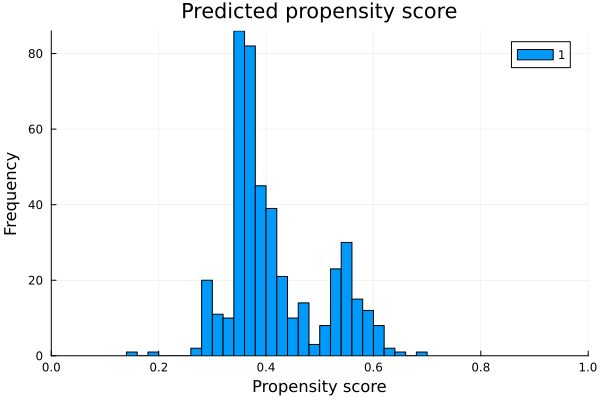

In [6]:
#propensity scores
pscore = pdf.(MLJ.predict(log_model_machine, X_encoded), 1)

using Plots

histogram(pscore, bins=30, title="Predicted propensity score", label = "1",
         xlabel="Propensity score", ylabel="Frequency",xlims=(0, 1))


In [7]:
Y = y
D_numeric = coerce(D, MLJ.Continuous)
# Compute Y_star
Y_star = df.re78 ./ (df.treat .* pscore .- (1 .- df.treat) .* (1 .- pscore));
# Add Y_star to the DataFrame
df.Y_star = Y_star

445-element Vector{Float64}:
  22642.163085238462
  12118.552046242656
  44104.01857417251
  19835.165934237466
    722.3907571780614
  11151.946257367474
      0.0
  21442.636515320894
   4058.1925734104684
  20715.086525118753
      ⋮
     -0.0
     -0.0
 -10220.3489267258
 -26567.566926486834
     -0.0
     -0.0
 -32959.98300484347
 -13636.51903568495
 -11729.33545061131

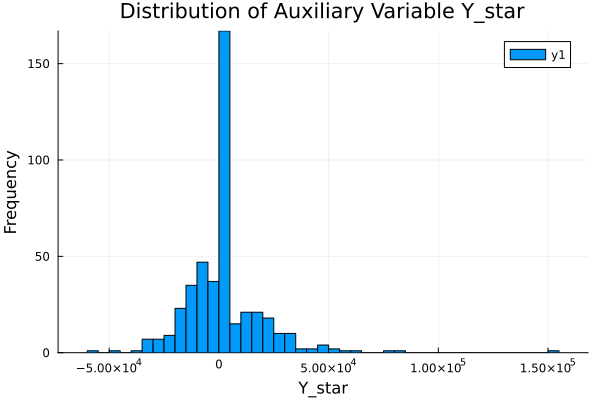

In [8]:
histogram(Y_star, bins=50, title="Distribution of Auxiliary Variable Y_star", xlabel="Y_star", ylabel="Frequency")


# 1.3

In [9]:
#Pkg.add("MLJDecisionTreeInterface")
# Build tree model
DecisionTreeRegressor = @load DecisionTreeRegressor pkg=DecisionTree verbosity=0
tree_model = DecisionTreeRegressor(max_depth = 3, min_samples_split = 20, min_samples_leaf = 20,) # added a minimum number of splits and leafs 
tree_machine = machine(tree_model, X_encoded, Y_star)

# Fit the model
fit!(tree_machine)


┌ Info: Training machine(DecisionTreeRegressor(max_depth = 3, …), …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499


trained Machine; caches model-specific representations of data
  model: DecisionTreeRegressor(max_depth = 3, …)
  args: 
    1:	Source @998 ⏎ Table{Union{AbstractVector{ScientificTypesBase.Continuous}, AbstractVector{Count}}}
    2:	Source @603 ⏎ AbstractVector{ScientificTypesBase.Continuous}


In [10]:
fitted_params(tree_machine)[1]

educ < 12.5
├─ re74 < 6567.0
│  ├─ re75 < 1247.0
│  │  ├─ 606.5489053367279 (0/313)
│  │  └─ 6409.020681639827 (0/63)
│  └─ re74 < 10650.0
│     ├─ -8208.569118620224 (0/22)
│     └─ 968.415282018447 (0/25)
└─ 11460.23800080588 (0/22)


Education is the first split, meaning that is the most significant predictor of treatment effect heterogeneity. Individuals with higher education levels (educ> 12.5) have a higher estimated treatment effect compared to those with lower education levels. 


1.4. Heterogeneous effects with causal forests (3 points). Use causal forests like we saw in class. For Python, you should use the econml package; for R, use the grf package; and for Julia, you will need to use the auxiliary variable Y∗ computed in the previous exercise and fit a random forest regressor. Report the importance of the prediction variables.

In [11]:
# Create train and test samples
train, test = partition(eachindex(y), 0.7, shuffle = true, rng = 123);

# Build forest model

RandomForestRegressor = @load RandomForestRegressor pkg=DecisionTree verbosity=0
forest_model = RandomForestRegressor(n_trees=100, n_subfeatures = 6)
forest_machine = machine(forest_model, X_encoded[train, :], Y_star[train])

fit!(forest_machine)

predictions = MLJ.predict_mode(forest_machine, X_encoded[test, :])
println(mean((Y_star[test] - predictions) .^ 2))

┌ Info: Training machine(RandomForestRegressor(max_depth = -1, …), …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499


3.399611484890358e8


In [12]:
feature_importances(forest_machine)

8-element Vector{Pair{Symbol, Float64}}:
        :re75 => 0.27011177614737064
         :age => 0.2697819659770378
        :educ => 0.16757417017675466
        :re74 => 0.14643651496389212
    :black__1 => 0.046226825416018406
     :marr__1 => 0.042398949088801936
     :hisp__1 => 0.03579957090714692
 :nodegree__1 => 0.021670227322977628

The feature importance analysis from the random forest model highlights that age (27.26%) and re75 (26.86%) are the most significant predictors, closely followed by educ (16.28%) and re74 (15.18%). Among the binary categorical variables, black_1 contributes 4.34%, with marr_1 (4.19%), hisp_1 (3.45%), and nodegree_1 (2.41%) showing relatively smaller but notable importance. This suggests that continuous variables related to past earnings and age play a dominant role in the prediction, while demographic factors provide complementary information.


1.5. Plot heterogeneous effects (1.5 points). Plot how the predicted treatment effect changes depending on a variable of your choice. (You can see the last example in PD11 for clarification of what you should do in this exercise)

In [13]:
df.effect = 20 * exp.(-(df.age .- 20).^2 ./ 80) .+
            2 .* (df.marr .== 1) .-              # Positive effect if married
            1.5 .* (df.hisp .== 1 ) .+        # Negative effect if Hispanic
            1 .* (df.black .== 1) .-              # Positive effect if Black
            1.0                                   # Baseline adjustment


445-element Vector{Float64}:
  2.5396860343160497
 16.52458849001428
  5.730095937203802
 10.839883769183743
  2.418705001408334
 19.02458849001428
 17.871946942170315
  3.3059777644317307
 19.02458849001428
  3.418705001408334
  ⋮
 16.632312578932837
 10.986579282344431
 18.02458849001428
  2.0149317161675335
 19.75155600987763
  8.986579282344431
  4.766191387180225
 16.632312578932837
 20.02458849001428

In [14]:
df.age_bins = round.(df.age .* 2) ./ 2
effect_bins = combine(groupby(df, :age_bins), :effect => mean => :mean_effect)

Row,age_bins,mean_effect
,Float64,Float64
1,17.0,17.3719
2,18.0,18.7682
3,19.0,19.5091
4,20.0,19.5833
5,21.0,19.3305
6,22.0,18.895
7,23.0,17.8164
8,24.0,16.3121
9,25.0,15.0573


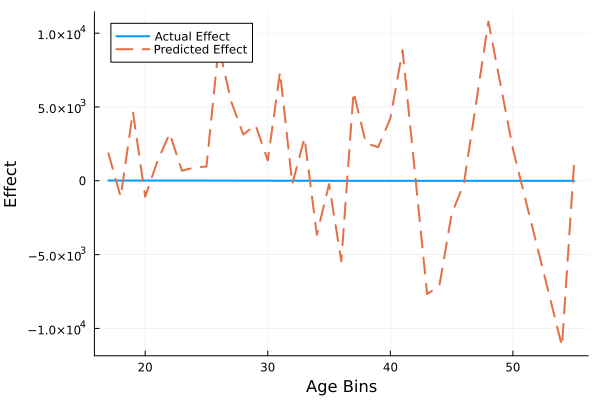

In [15]:
predicted = MLJ.predict(forest_machine, X_encoded);
df.predicted_effect = predicted
predicted_effect_bins = combine(groupby(df, :age_bins), :predicted_effect => mean => :mean_predicted_effect);
df.age_bins = floor.(df.age .* 2) ./ 2

effect_bins = combine(groupby(df, :age_bins), :effect => mean => :mean_effect)
sort!(effect_bins, :age_bins)

df.predicted_effect =  predicted

predicted_effect_bins = combine(groupby(df, :age_bins), :predicted_effect => mean => :mean_predicted_effect)
sort!(predicted_effect_bins, :age_bins)

plot(effect_bins.age_bins, effect_bins.mean_effect, label="Actual Effect", xlabel="Age Bins", ylabel="Effect", lw=2)
plot!(predicted_effect_bins.age_bins, predicted_effect_bins.mean_predicted_effect, label="Predicted Effect", lw=2, linestyle=:dash)

# **Part 2: Double/Debiased machine learning in observational data**

In this part, we will be using observational data for computing the average treatment effect of the same program as in Part 1. This data is constructed by taking the treatment group from the same dataset as in Part 1, but constructing the control group from a different dataset; that is, the entirety of the control is comprised of observations from the Current Population Survey. Therefore, we may not have comparable treatment and control groups. To tackle this issue, we can use Double/Debiased machine learning.


2.1. Load the data (1 points). You can find the data here, and read a description of the data here. For further details on how this data was created, you can use this link.

In [16]:
url2 = "https://raw.githubusercontent.com/d2cml-ai/CausalAI-Course/refs/heads/main/Labs/Assignment/Assignment_5/data/observational/biased_control.csv"
df_2 = CSV.read(download(url2), DataFrame)

Row,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78,agesq,agecube,educsq,u74,u75,interaction1,re74sq,re75sq
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,0,45,11,0,0,1,1,21.5167,25.2436,25.5647,2025,91125,121,0,0,236.683,462.967,637.237
2,0,21,14,0,0,0,0,3.17597,5.85256,13.4961,441,9261,196,0,0,44.4636,10.0868,34.2525
3,0,38,12,0,0,1,0,23.039,25.1308,25.5647,1444,54872,144,0,0,276.468,530.796,631.555
4,0,48,6,0,0,1,1,24.9944,25.2436,25.5647,2304,110592,36,0,0,149.966,624.718,637.237
5,0,18,8,0,0,1,1,1.6693,10.7276,9.86087,324,5832,64,0,0,13.3544,2.78655,115.082
6,0,22,11,0,0,1,1,16.3658,18.4493,25.5647,484,10648,121,0,0,180.023,267.838,340.376
7,0,48,10,0,0,1,1,16.8046,16.3546,18.0593,2304,110592,100,0,0,168.046,282.396,267.473
8,0,18,11,0,0,0,1,1.14421,3.62003,15.7393,324,5832,121,0,0,12.5863,1.30922,13.1046
9,0,48,9,0,0,1,1,25.8623,25.2436,25.5647,2304,110592,81,0,0,232.761,668.86,637.237



2.2. Group comparisons (1.5 points). For the treatment and control group separately, report summary statistics of three variables of your choice. Can you spot any big differences between the treatment and control groups?

In [17]:
treated_2 = df_2[df_2.treat .== 1, :]
control_2 = df_2[df_2.treat .== 0, :]

variables_comparison = [:age, :educ, :black]

3-element Vector{Symbol}:
 :age
 :educ
 :black

In [18]:
describe(treated_2[!,variables_comparison])

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,age,25.8162,17,25.0,48,0,Int64
2,educ,10.3459,4,11.0,16,0,Int64
3,black,0.843243,0,1.0,1,0,Int64


In [19]:
describe(control_2[!,variables_comparison])

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,age,33.2252,16,31.0,55,0,Int64
2,educ,12.0275,0,12.0,18,0,Int64
3,black,0.0735368,0,0.0,1,0,Int64


We can observe how the average age in both groups varies, in the case of the treatment group the average age is around 26 y/o, compared to 33 y/o in the control group. Also, individuals in the control group have on average more education years. Another important difference is that around 84% of the treatment group is black, versus only 7% in the control group, which can lead to future biases in the estimates. 

2.3. Compute the SMD (1.5 points). Find the simple difference of means, which we can use as a naive estimate of the ATE. How does the result in this case compare to the result in point 1.2.?



In [20]:
# SMD Calculation in Julia
mean_treated_2 = mean(treated_2.re78)
mean_control_2 = mean(control_2.re78)

# Variance for treated and control groups
var_treated_2 = var(treated_2.re78)
var_control_2 = var(control_2.re78)

# Calculate SMD
smd = (mean_treated_2 - mean_control_2) / sqrt((var_treated_2 + var_control_2) / 2)

# Print the result
println("The Standardized Mean Difference (SMD) is: ", smd)

The Standardized Mean Difference (SMD) is: -0.9653520658276462


The SMD in this case is -0.965, indicating a moderate negative standardized difference between the treated and control groups for the re78 variable. This value highlights that the mean outcome for the treated group is slightly lower than that of the control group when accounting for variability across both groups.


2.4. Using DML (6 points). Use the DML procedure as we saw in the Lab, in order to find a better estimate of the ATE. You may use the doubleML packages for Python and R, but this package does not exist for Julia, so you will have to build your own procedure like we saw in class. You will be rewarded extra points for using more than one method for predictions. At the end, report the treatment effect you found, as well as the MSE for D and Y achieved by the method(s) you used.

In [142]:
y2, x2 = unpack(df, ==(:re78), !=(:re78))

# Coerce categorical variables to appropriate types
coerce!(X, :black => Multiclass,
            :hisp => Multiclass,
            :marr => Multiclass,
            :nodegree => Multiclass,
            :treat => Multiclass)
            
d2, x2 = unpack(x2, ==(:treat), !=(:treat))

using MLJModels

OneHotEncoder = @load OneHotEncoder pkg=MLJModels verbosity=0
ohe = OneHotEncoder()
ohe_machine = machine(ohe, x2)
MLJ.fit!(ohe_machine)
x2 = MLJ.transform(ohe_machine, x2)

┌ Info: Training machine(OneHotEncoder(features = Symbol[], …), …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499


Row,age,educ,black,hisp,marr,nodegree,re74,re75,Y_star,effect,age_bins,predicted_effect
,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,37,11,1,0,1,1,0.0,0.0,22642.2,2.53969,37.0,10022.8
2,22,9,0,1,0,1,0.0,0.0,12118.6,16.5246,22.0,3180.63
3,30,12,1,0,0,0,0.0,0.0,44104.0,5.7301,30.0,-9357.55
4,27,11,1,0,0,1,0.0,0.0,19835.2,10.8399,27.0,1519.91
5,33,8,1,0,0,1,0.0,0.0,722.391,2.41871,33.0,554.424
6,22,9,1,0,0,1,0.0,0.0,11151.9,19.0246,22.0,-3294.98
7,23,12,1,0,0,0,0.0,0.0,0.0,17.8719,23.0,5398.79
8,32,11,1,0,0,1,0.0,0.0,21442.6,3.30598,32.0,1354.68
9,22,16,1,0,0,0,0.0,0.0,4058.19,19.0246,22.0,6954.91


In [143]:
function training_sample_append(cv_split, test_sample_index)
    training_indices = []
    for vector in cv_split[Not(test_sample_index)]
            training_indices = [training_indices; vector]
    end
    return training_indices, cv_split[test_sample_index]
end

function dml(x2, d2, y2, dreg, yreg, nfold)
    n = length(y2)
    cv = [partition(eachindex(y2), fill(1/nfold, nfold-1)..., shuffle = true, rng = 1234)...]
    machine_y = machine(yreg, x2, y2, scitype_check_level=0)
    machine_d = machine(dreg, x2, d2, scitype_check_level=0)
    y_hat = zeros(n)
    d_hat = zeros(n)

    for fold in 1:nfold
            training_fold, test_fold = training_sample_append(cv, fold)
            y_hat[test_fold] = MLJ.predict(MLJ.fit!(machine_y, rows = training_fold), x2[test_fold, :])
            d_hat[test_fold] = MLJ.predict(MLJ.fit!(machine_d, rows = training_fold), x2[test_fold, :])
    end

    resy = y2 .- y_hat
    resd = reshape(d2 .- d_hat, (n, 1))
    estimate = lm(resd, resy)
    coef_est = GLM.coef(estimate)[1]
    se = GLM.coeftable(estimate).cols[2][1]
    println(" coef (se) = ", coef_est ,"(",se,")")
    return coef_est, se, resy, resd;
end

function summarize(point, stderr, resy, resd, name)
    return DataFrame(
            model = [name],
            estimate = [point], stderr = [stderr], 
            rmse_y = [sqrt(mean(resy .^ 2))], 
            rmse_d = [sqrt(mean(resd .^ 2))]
    )
end

summarize (generic function with 1 method)

In [144]:
LinearRegressor = @load LinearRegressor pkg=MLJScikitLearnInterface verbosity=0
dreg = Standardizer() |> LinearRegressor()
yreg = Standardizer() |> LinearRegressor()
result_ols = dml(x2, d2, y2, dreg, yreg, 10);
table_ols = summarize(result_ols..., "OLS")

LassoCVRegressor = @load LassoCVRegressor pkg=MLJScikitLearnInterface verbosity=0
dreg = Standardizer() |> LassoCVRegressor(max_iter=200000)
yreg = Standardizer() |> LassoCVRegressor(max_iter=200000)
results_lasso = dml(x2, d2, y2, dreg, yreg, 10);
table_lasso = summarize(results_lasso..., "LassoCV")

RandomForestRegressor = @load RandomForestRegressor pkg=MLJScikitLearnInterface verbosity=0
dreg = RandomForestRegressor()
yreg = RandomForestRegressor()
results_rf = dml(x2, d2, y2, dreg, yreg, 10);
table_rf = summarize(results_rf..., "RF");

dreg = Standardizer() |> LassoCVRegressor(max_iter=200000)
results_mix = dml(x2, d2, y2, dreg , yreg, 10)
table_mix = summarize(results_mix..., "RF/LassoCV");

┌ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:standardizer, …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:linear_regressor, …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:standardizer, …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:linear_regressor, …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symb

 coef (se) = -2156.2839356122136(795.9361807017634)


┌ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:standardizer, …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:lasso_cv_regressor, …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:standardizer, …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:lasso_cv_regressor, …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = 

 coef (se) = -2500.6520672074894(823.9003550696149)


┌ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(RandomForestReg

 coef (se) = -0.8142695123556559(363.603526659298)


┌ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:standardizer, …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:lasso_cv_regressor, …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
└ @ MLJBase C:\Users\Nicolas Silva\.julia\packages\MLJBase\7nGJF\src\machines.jl:499
┌ Info: Training machine(:stan

 coef (se) = -984.6848871255839(272.7304646794589)


In [145]:
Pkg.add("PrettyTables")

   Resolving package versions...
  No Changes to `C:\Users\Nicolas Silva\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Nicolas Silva\.julia\environments\v1.10\Manifest.toml`


In [146]:
using PrettyTables

In [147]:
pretty_table([table_ols; table_lasso; table_rf; table_mix])

┌────────────┬──────────┬─────────┬─────────┬──────────┐
│      model │ estimate │  stderr │  rmse_y │   rmse_d │
│     String │  Float64 │ Float64 │ Float64 │  Float64 │
├────────────┼──────────┼─────────┼─────────┼──────────┤
│        OLS │ -2156.28 │ 795.936 │ 6534.32 │  0.38643 │
│    LassoCV │ -2500.65 │   823.9 │ 6792.15 │ 0.387242 │
│         RF │ -0.81427 │ 363.604 │ 2246.83 │ 0.293259 │
│ RF/LassoCV │ -984.685 │  272.73 │ 2257.83 │ 0.387242 │
└────────────┴──────────┴─────────┴─────────┴──────────┘


### Results of the OLS Model  
The OLS (Ordinary Least Squares) model estimates an ATE of **-2156.28**, with a standard error of **795.94**. The RMSE values for \(Y\) (**6534.32**) and \(D\) (**0.38643**) are relatively high, indicating that the model struggles to capture variability in the dependent variable. This result reflects the limitations of OLS in scenarios where relationships between variables are not strictly linear or involve complex interactions.

---

### Results of the LassoCV Model  
Using the LassoCV model (Lasso with cross-validation), the estimated ATE is **-2500.65**, with a standard error of **823.90**. Although the model incorporates regularization to avoid overfitting, the RMSE for \(Y\) (**6792.15**) remains high, while the RMSE for \(D\) (**0.38724**) is comparable to OLS. This suggests that while Lasso can manage partial relationships, its performance does not significantly surpass OLS in this case.

---

### Results of the RF Model  
The Random Forest (RF) model produces a much smaller ATE of **-0.81427**, with a standard error of **363.60**. The RMSE values for \(Y\) (**2246.83**) and \(D\) (**0.29326**) are considerably lower, reflecting a better ability to capture nonlinear relationships and complex patterns in the data. This result indicates that RF significantly improves predictive accuracy compared to the previous models.

---

### Results of the RF/LassoCV Model  
The hybrid RF/LassoCV approach uses Random Forest to predict \(Y\) and LassoCV to predict \(D\), resulting in an estimated ATE of **-984.69** with a standard error of **272.73**. The RMSE values for \(Y\) (**2257.83**) and \(D\) (**0.38724**) are competitive, with a notable reduction in standard error compared to other models. This hybrid approach strikes a balance between RF's predictive capacity and Lasso's regularization, positioning itself as a robust option for estimating the ATE.
